# Anisotropy of aligned inclusions: background and the pyVBRc 



## tandon & weng


In [1]:
from pyVBRc.anisotropy.materials import AlignedInclusions, IsotropicMedium
import matplotlib.pyplot as plt 
import numpy as np

They considered an epoxy matrix with stronger glass fibre inclusions:

In [2]:
# epoxy matrix:
matrix = IsotropicMedium(0.35, 2.76, "youngs")
# glass fibres
inclusions = IsotropicMedium(0.2, 72.4, "youngs")

Text(0.5, 0, 'volume fraction')

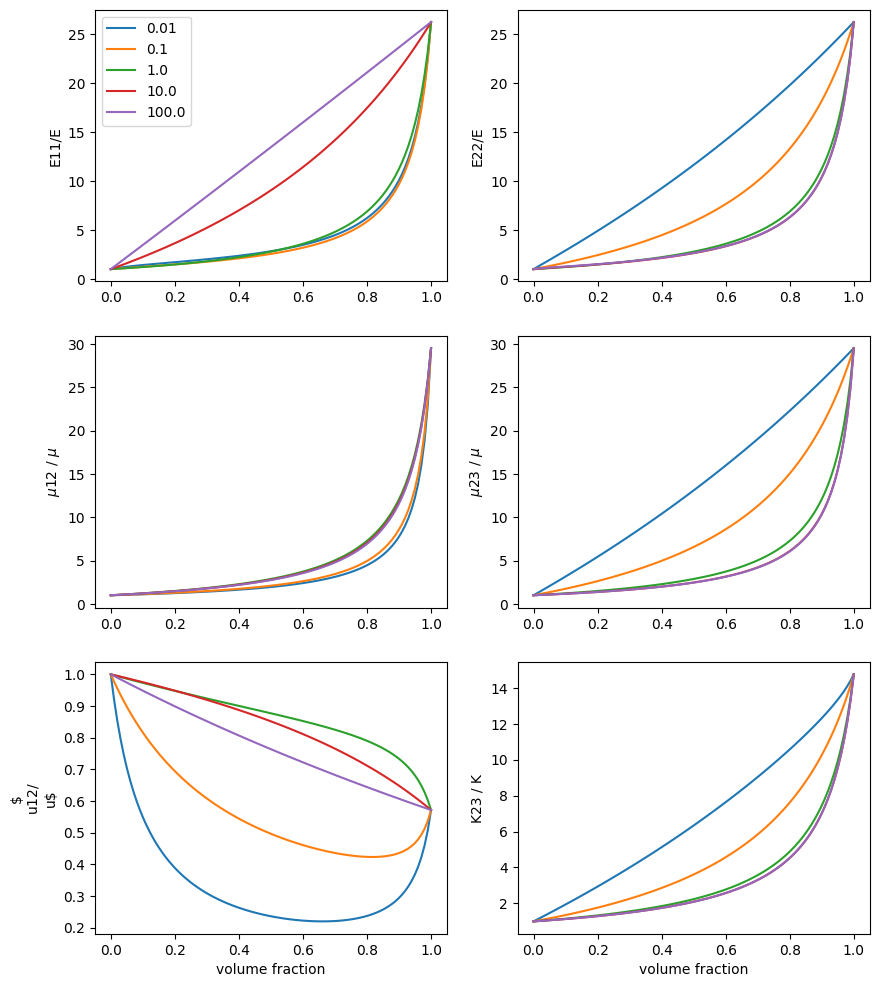

In [3]:
vol_frac = np.linspace(0, 1, 100)

f, axs = plt.subplots(nrows = 3, ncols=2, figsize=(10,12))
for aspect_ratio in [0.01, 0.1, 1., 10., 100.]:
    ai = AlignedInclusions(aspect_ratio)    
    ai.set_material(matrix, inclusions, vol_frac)
    E11, E22, mu12, mu23, nu12, K23 = ai.get_moduli()
    axs[0,0].plot(vol_frac, E11/matrix.youngs_modulus, label=aspect_ratio)
    axs[0,1].plot(vol_frac, E22/matrix.youngs_modulus, label=aspect_ratio)
    axs[1,0].plot(vol_frac, mu12/matrix.shear_modulus, label=aspect_ratio)
    axs[1,1].plot(vol_frac, mu23/matrix.shear_modulus, label=aspect_ratio)
    axs[2,0].plot(vol_frac, nu12/matrix.poisson_ratio, label=aspect_ratio)
    axs[2,1].plot(vol_frac, K23/matrix.plain_strain_bulk, label=aspect_ratio)

axs[0,0].legend(loc="upper left")    
axs[0,0].set_ylabel('E11/E')    
axs[0,1].set_ylabel('E22/E')
axs[1,0].set_ylabel("$\mu$12 / $\mu$")
axs[1,1].set_ylabel("$\mu$23 / $\mu$")
axs[2,0].set_ylabel("$\nu$12 / $\nu$")
axs[2,1].set_ylabel("K23 / K")

axs[2,0].set_xlabel('volume fraction')
axs[2,1].set_xlabel('volume fraction')

## Sayers 1992

Uses Tandon and Weng, calculates full stiffness matrix values:

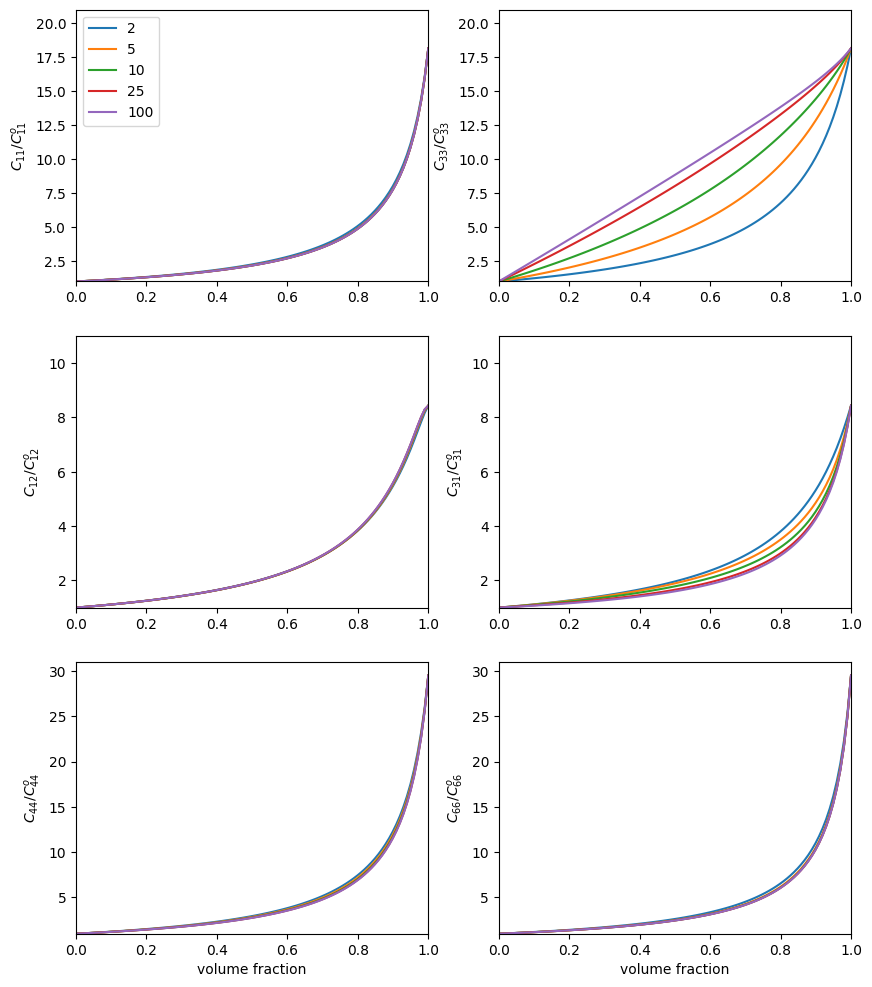

In [4]:
vol_frac = np.linspace(0, 1, 100)
f, axs = plt.subplots(nrows = 3, ncols=2, figsize=(10,12))

aniso_factors = {}
for aspect_ratio in [2, 5, 10, 25, 100]:
    ai = AlignedInclusions(aspect_ratio)    
    ai.set_material(matrix, inclusions, vol_frac)
    stiff = ai.get_stiffness_matrix()
    C = stiff.stiffness
    aniso_factors[aspect_ratio] = {}
    aniso_factors[aspect_ratio]['a_1'] = stiff.a_1
    aniso_factors[aspect_ratio]['a_2'] = stiff.a_2
    aniso_factors[aspect_ratio]['a_3'] = stiff.a_3
    axs[0,0].plot(vol_frac, C[0,0,:]/C[0,0,0], label=aspect_ratio)
    axs[0,1].plot(vol_frac, C[2,2,:]/C[2,2,0], label=aspect_ratio)
    axs[1,0].plot(vol_frac, C[0,1,:]/C[0,1,0], label=aspect_ratio)
    axs[1,1].plot(vol_frac, C[2,0,:]/C[2,0,0], label=aspect_ratio)
    axs[2,0].plot(vol_frac, C[3,3,:]/C[3,3,0], label=aspect_ratio)
    axs[2,1].plot(vol_frac, C[5,5,:]/C[5,5,0], label=aspect_ratio)
    
axs[0,0].set_ylabel("$C_{11} / C_{11}^o$")
axs[0,1].set_ylabel("$C_{33} / C_{33}^o$")
axs[1,0].set_ylabel("$C_{12} / C_{12}^o$")
axs[1,1].set_ylabel("$C_{31} / C_{31}^o$")
axs[2,0].set_ylabel("$C_{44} / C_{44}^o$")
axs[2,1].set_ylabel("$C_{66} / C_{66}^o$")

miny = 1
axs[0,0].set_ylim([miny, 20+miny])
axs[0,1].set_ylim([miny, 20+miny])
axs[1,0].set_ylim([miny, 10+miny])
axs[1,1].set_ylim([miny, 10+miny])
axs[2,0].set_ylim([miny, 30+miny])
axs[2,1].set_ylim([miny, 30+miny])

axs[2,0].set_xlabel("volume fraction")
axs[2,1].set_xlabel("volume fraction")

for irow in range(3):
    for icol in range(2):
        axs[irow, icol].set_xlim([0, 1])
        
axs[0,0].legend(loc="upper left")

additionally, Sayers includes 3 anisotropy factors: $a_1$, $a_2$, $a_3$:

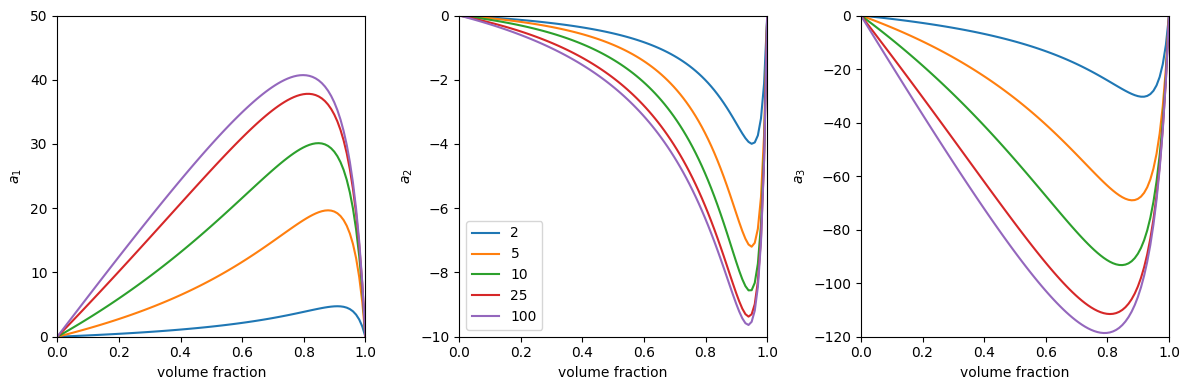

In [5]:
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for ar, aniso in aniso_factors.items():
    axs[0].plot(vol_frac, aniso['a_1'], label=ar)
    axs[1].plot(vol_frac, aniso['a_2'], label=ar)
    axs[2].plot(vol_frac, aniso['a_3'], label=ar)

axs[0].set_ylabel("$a_1$")    
axs[1].set_ylabel("$a_2$")   
axs[2].set_ylabel("$a_3$")   

axs[0].set_ylim([0, 50])    
axs[1].set_ylim([-10, 0])
axs[2].set_ylim([-120, 0])

axs[1].legend(loc='lower left')

for ix in range(3):
    axs[ix].set_xlim([0, 1])
    axs[ix].set_xlabel('volume fraction')
    
f.tight_layout()

sayer's  notes that the limit of the volume fraction going to 1 is not a realistic limit as the volume fraction of inclusions will be limited by the closest packing of inclusions, so the above plots may not be realistic past aorund 0.7. 

## Velocities 

Kendall (2000) uses  Tandon & Weng, Sayers to calculate stiffness matrix elements to provide to Thomsen method for calculating S- and P- anisotropy. 

First, let's check out the velocities

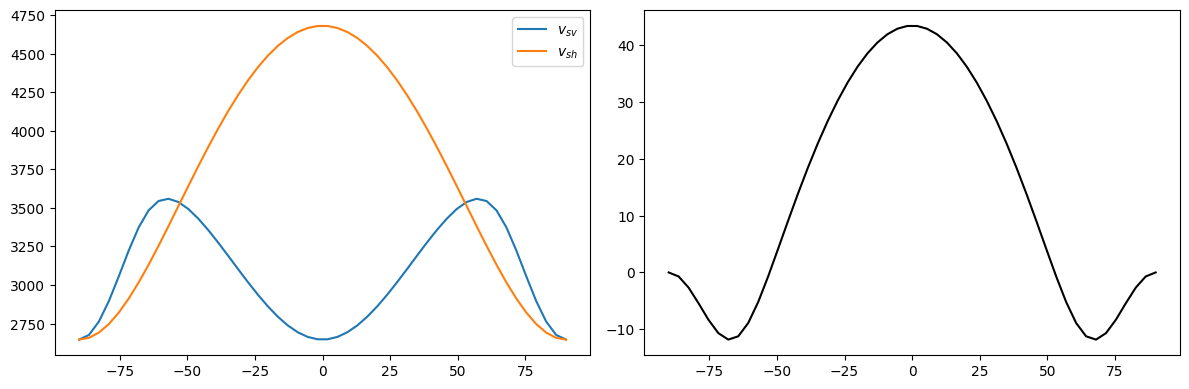

In [6]:
vol_frac = 0.1

matrix = IsotropicMedium(0.25, 80*1e9, "shear", density=3300)
inclusions = IsotropicMedium(0.25, 3*1e9, "shear", density=3300)
ai = AlignedInclusions(0.001)    
ai.set_material(matrix, inclusions, vol_frac)

theta = np.linspace(0, np.pi, 50)
azi = theta * 180/np.pi - 90.
v_p, v_sv, v_sh = ai.velocities(theta)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].plot(azi, v_sv, label="$v_{sv}$")
axs[0].plot(azi, v_sh, label="$v_{sh}$")
axs[0].legend(loc='upper right')

axs[1].plot(azi, (v_sh - v_sv)/v_sh*100, 'k')
fig.tight_layout()

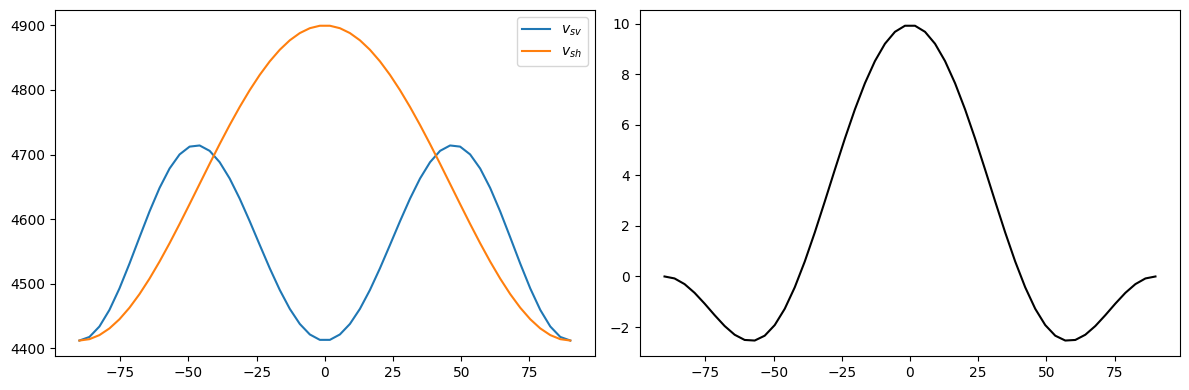

In [7]:
vol_frac = 0.01

matrix = IsotropicMedium(0.25, 80*1e9, "shear", density=3300)
inclusions = IsotropicMedium(0.25, 3*1e9, "shear", density=3300)
ai = AlignedInclusions(0.001)    
ai.set_material(matrix, inclusions, vol_frac)

theta = np.linspace(0, np.pi, 50)
azi = theta * 180/np.pi - 90.
v_p, v_sv, v_sh = ai.velocities(theta)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].plot(azi, v_sv, label="$v_{sv}$")
axs[0].plot(azi, v_sh, label="$v_{sh}$")
axs[0].legend(loc='upper right')

axs[1].plot(azi, (v_sh - v_sv)/v_sh*100, 'k')
fig.tight_layout()

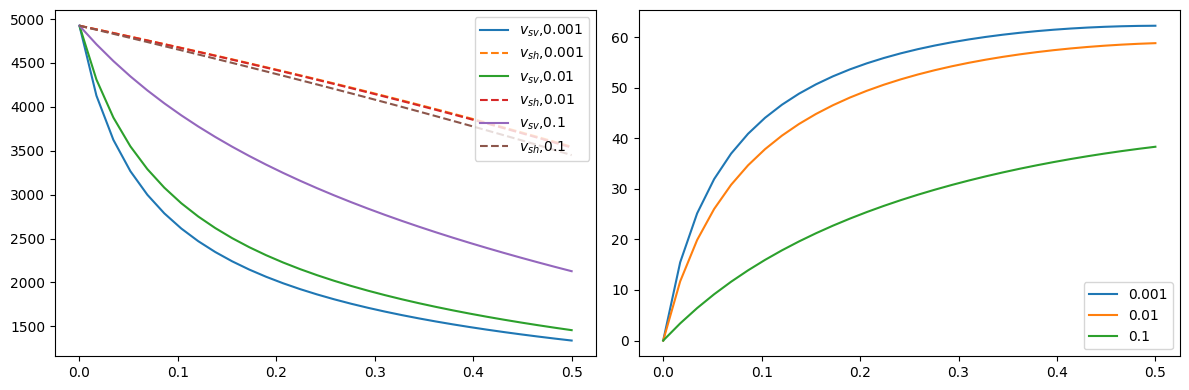

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

for a_r in [0.001, 0.01, 0.1]:
    vol_frac = np.linspace(0, 0.5, 30)

    matrix = IsotropicMedium(0.25, 80*1e9, "shear", density=3300)
    inclusions = IsotropicMedium(0.25, 3*1e9, "shear", density=3300)
    ai = AlignedInclusions(a_r)    
    ai.set_material(matrix, inclusions, vol_frac)

    v_p, v_sv, v_sh = ai.velocities(np.pi/2)

    
    axs[0].plot(vol_frac, v_sv, label="$v_{sv}$,"+ f"{a_r}")
    axs[0].plot(vol_frac, v_sh, label="$v_{sh}$,"+ f"{a_r}", linestyle='--')
    axs[0].legend(loc='upper right')

    axs[1].plot(vol_frac, (v_sh - v_sv)/v_sh*100, label=a_r)    
    fig.tight_layout()
    
axs[1].legend(loc='lower right')

### Kendall 2000 figure 5: 

for two aspect ratios, calculate percent anisotropy for a range of volume fraction and velocity contrasts. 

For the velocity contrasts, we will set the matrix and then calculate the inclusion modulus for a given velocity contrast assuming the matrix and inclusion have the same density (so we can simply vary the shear modulus between the two).

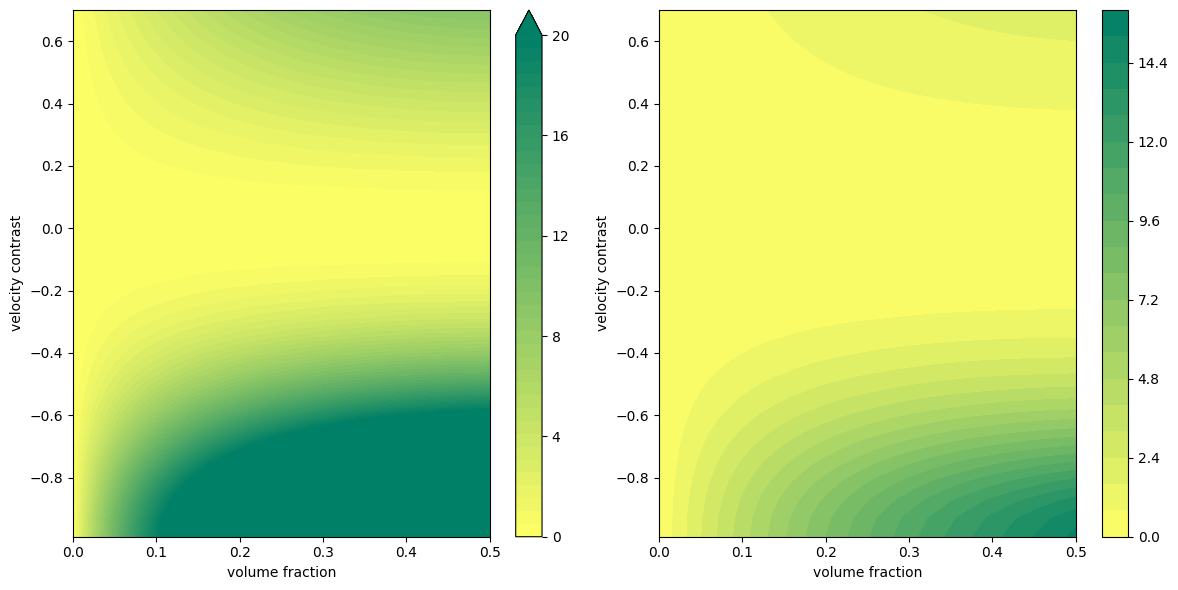

In [13]:
vol_frac = np.linspace(0, 0.5, 50)
nvelo = 30
velo_contrast = np.linspace(-0.99, 0.7, nvelo)

matrix = IsotropicMedium(0.25, 80, "shear", density=3300)

results = {}
for a_r in [0.1, 20]:
    swave_ani = np.zeros((nvelo, vol_frac.size))
    for ivelo in range(nvelo):
        G2 = matrix.shear_modulus * (1 + velo_contrast[ivelo])**2    
        inclusions = IsotropicMedium(0.25, G2, "shear", density=3300)

        ai = AlignedInclusions(a_r)    
        ai.set_material(matrix, inclusions, vol_frac)

        v_p, v_sv, v_sh = ai.velocities(np.pi/2)

        swave_ani[ivelo, :] = np.abs(v_sh - v_sv)/v_sh * 100
    results[a_r] = swave_ani
    
    
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
vmin = 0
vmax = 20
contourf_ = axs[0].contourf(vol_frac, velo_contrast, results[0.1], cmap='summer_r', levels=np.linspace(vmin,vmax,40),extend='max')
cbar = fig.colorbar(contourf_,ticks=range(vmin, vmax+2, 4))
axs[0].set_xlabel('volume fraction')
axs[0].set_ylabel('velocity contrast')


vmin = 0
vmax = 20
contourf_ = axs[1].contourf(vol_frac, velo_contrast, results[20], cmap='summer_r', levels= 20)
cbar = fig.colorbar(contourf_)
axs[1].set_xlabel('volume fraction')
axs[1].set_ylabel('velocity contrast')
fig.tight_layout()

### Holtzman & Kendall Figure 9d 

s wave anisotropy vs aspect ratio for aligned melt

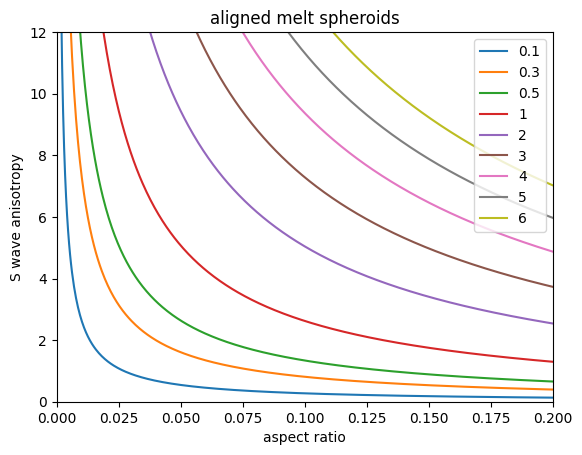

In [14]:
vol_frac = np.linspace(0, 0.5, 5)
nvelo = 30
matrix = IsotropicMedium(0.25, 80, "shear", density=3300)
inclusions = IsotropicMedium(0.25, 0., "shear", density=2700)
a_r = np.linspace(0.0001, 0.2, 500)
ai = AlignedInclusions(a_r)    

results = {}
for vol_frac_pct in [0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 6]:
    vol_frac = vol_frac_pct/100
    ai.set_material(matrix, inclusions, vol_frac)
    v_p, v_sv, v_sh = ai.velocities(np.pi/2)
    results[vol_frac_pct] = np.abs(v_sh - v_sv)/v_sh * 100 
    
    plt.plot(a_r,  results[vol_frac_pct], label= vol_frac_pct)
plt.ylim([0, 12])
plt.xlim([0, 0.2])
plt.ylabel("S wave anisotropy")
plt.title("aligned melt spheroids")
plt.xlabel("aspect ratio")
plt.legend(loc='upper right')    